# 1. Clustering은 왜 중요한가?

clustering은 매우 다양한 분야에 이용된다. 다양한 데이터들을 요약 혹은 속성을 파악하는 데 쓰이기도 하고, 데이터 구조화 혹은 시각화에도 쓰이며, 데이터 outlier검출, 데이터 마이닝 등 매우 다양한 분야에서 이용된다.

# 2. Clustering은 일상생활에 어떻게 적용되는가?

주로 관련성 있는 데이터들을 묶어서 활용할 때 쓰인다. 예를 들어 네이버는 기사를 보여줄 때, 뉴스 검색 결과에 clustering을 적용해서 관련 있는 데이터들을 판단하고 추출해, 사용자가 관심있어할 만한 정보들을 모아서 보여준다.

# 3. Clustering을 활용 가능한 주요 알고리즘이나 패키지에는 무엇이 있는가?


a. K-means : cluster의 수 K를 사용자가 제시해준 뒤, cluster의 memberships나 centroid들을 무작위로 설정해 주어 각각의 데이터들을 centroids와 비교해서 가까운 cluster에 들어가게 된다. 그리고 그렇게 형성한 cluster 안의 data points를 일정한 기준으로 centroid를 새로 만들어서 다시 data points를 비교하고 클러스터를 배정한다. 이 과정을 centroid가 더이상 바뀌지 않을 때까지 반복한다. 장점은 간단하고 범용성과 속도가 뛰어나다는 것이다. 단점은 처음에 잘못된 centorid를 가지고 시작하면 영원히 값이 안 나올 수도 있다는 것과, K의 개수를 정해주어야 한다는 점(정하기가 어렵다). 구 형태의 cluster가 나올 수밖에 없다는 점이다.
![clustering_Kmeans](./images/clustering_Kmeans.png)


a.min : cluster간 가장 가까운 점의 거리를 잰다. 촘촘히 모여만 있다면 모양에 상관없이 잘 동작하나, 가까우면 다른 cluster에도 붙는다.(noise, outlier에 취약하다.)

b.max : cluster간 가장 먼 점의 거리를 잰다. min에 비해 상대적으로 noise와 outlier에 강하다.

c.group average : 모든 점들의 거리를 재서 distance의 평균을 잰다. noise와 outlier에 강하지만, 구형으로 군집화가 진행된다.
![clustering_agglomerative](./images/clustering_agglomerative.png)
(agglomerative기준)

d.DBSCAN : 원하는 탐색 거리(eps)와 밀집도(minpt)를 주어 진행한다. points가 eps내에 minpt 이상 있으면, 그 point는 core point이다. 만약 core point의 범위 내에 있으나 minpt를 만족 못하면 border point, 이 밖의 것들은 noise point라 하여 계산을 할 땐 버린다. core points끼리 같은 범위 내에 있다면 cluster를 병합시킨다. cluster의 수를 정해줄 필요가 없고, density정보에 취약하고 고차원으로 갈 수록 원하는 결과가 나오지 않을 수도 있다.
![clustering_dbscan](./images/clustering_dbscan.png)

clustering의 패키지에는 sklearn의 K-means와 DBSCAN이 있다.
Kmeans를 사용할 때는 cluster의 수(K)를 설정해 주어야 하고,
DBSCAN을 사용할 때는 eps(radius)와 min_samples(최소의 point 개수)를 설정해 주어야 한다.

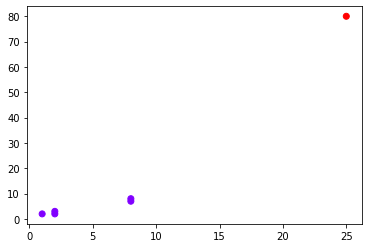

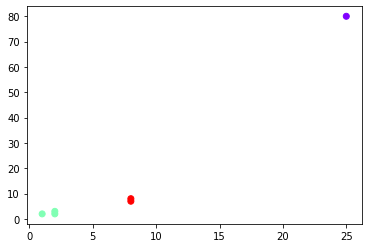

In [12]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 2], [2, 2], [2, 3], [8, 7], [8, 8], [25, 80]])

#K-Means
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.show()

#DBSCAN
dbscan = DBSCAN(eps=3, min_samples=2).fit(X)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='rainbow')
plt.show()

# 4. Clustering의 핵심 아이디어는 무엇인가?

clustering에는 크게 partitional과 hierarchical이 있다.


partitional은 하나의 데이터는 무조건 하나의 cluster 안에 들어가 있는 형태이다.


hierarchical은 cluster끼리 서로 종속될 수 있다는 것이다. K를 줄 필요가 없다. 왜냐하면 어쨌든 cluster로 모두 묶이기 때문이다. 2개의 방식이 있는데, 묶어나가는 agglomerative 방식과, 쪼개나가는 divisive 방식이 있다. 트리와 덴드로그램으로 나타낼 수 있어 활용하기가 좋다. clustering을 수행하기 전에 proximity matrix를 만든 뒤에 알고리즘에 맞춰 수행한다. 한 번 grouping이 결정되면 바뀔 수가 없다.
![clustering_dendrogram](./images/clustering_dendrogram.png)
(dendroid)

clustering이란 결국 명확한 기준을 가지고 유사한 data points들끼리 묶는 기법이라고 할 수 있다.